# Import Libraries / Environment Set Up:

In [13]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import os
import seaborn as sns


In [3]:
import kagglehub

path = kagglehub.dataset_download("artermiloff/steam-games-dataset")
print("Dataset downloaded to:", path)

c:\Users\oscar\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset downloaded to: C:\Users\oscar\.cache\kagglehub\datasets\artermiloff\steam-games-dataset\versions\2


In [4]:
df = pd.read_csv(os.path.join(path, 'games_march2025_cleaned.csv'))

df.head()

,appid,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,...,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,discount,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
0,730,Counter-Strike 2,2012-08-21,0,0.00,1,"For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...",NaN,...,879,5174,350,0,1212356,"{'FPS': 90857, 'Shooter': 65397, 'Multiplayer'...",86,8632939,82,96473
1,578080,PUBG: BATTLEGROUNDS,2017-12-21,0,0.00,0,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...","LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...",Play PUBG: BATTLEGROUNDS for free. Land on str...,NaN,...,0,0,0,0,616738,"{'Survival': 14838, 'Shooter': 12727, 'Battle ...",59,2513842,68,16720
2,570,Dota 2,2013-07-09,0,0.00,2,"The most-played game on Steam. Every day, mill...","The most-played game on Steam. Every day, mill...","Every day, millions of players worldwide enter...",“A modern multiplayer masterpiece.” 9.5/10 – D...,...,1536,898,892,0,555977,"{'Free to Play': 59933, 'MOBA': 20158, 'Multip...",81,2452595,80,29366
3,271590,Grand Theft Auto V Legacy,2015-04-13,17,0.00,0,"When a young street hustler, a retired bank ro...","When a young street hustler, a retired bank ro...",Grand Theft Auto V for PC offers players the o...,NaN,...,771,7101,74,0,117698,"{'Open World': 32644, 'Action': 23539, 'Multip...",87,1803832,92,17517
4,359550,Tom Clancy's Rainbow Six® Siege,2015-12-01,17,3.99,9,Edition Comparison Ultimate Edition The Tom Cl...,“One of the best first-person shooters ever ma...,"Tom Clancy's Rainbow Six® Siege is an elite, t...",NaN,...,682,2434,306,80,89916,"{'FPS': 9831, 'PvP': 9162, 'e-sports': 9072, '...",84,1168020,76,12608


# Data Preprocessing:

## Check for NA values:

In [5]:
df.isnull().sum()

appid                           0
name                            0
release_date                    0
required_age                    0
price                           0
dlc_count                       0
detailed_description          197
about_the_game                220
short_description             120
reviews                     79217
header_image                    0
website                     48504
support_url                 45508
support_email               10820
windows                         0
mac                             0
linux                           0
metacritic_score                0
metacritic_url              86071
achievements                    0
recommendations                 0
notes                       72975
supported_languages             0
full_audio_languages            0
packages                        0
developers                      0
publishers                      0
categories                      0
genres                          0
screenshots   

In [6]:
# Drop columns with any NA values and unnecessary columns
df.drop(columns=df.columns[df.isnull().any()], inplace=True)
df.drop(columns=['header_image', 'screenshots', 'movies'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89618 entries, 0 to 89617
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   appid                     89618 non-null  int64  
 1   name                      89618 non-null  object 
 2   release_date              89618 non-null  object 
 3   required_age              89618 non-null  int64  
 4   price                     89618 non-null  float64
 5   dlc_count                 89618 non-null  int64  
 6   windows                   89618 non-null  bool   
 7   mac                       89618 non-null  bool   
 8   linux                     89618 non-null  bool   
 9   metacritic_score          89618 non-null  int64  
 10  achievements              89618 non-null  int64  
 11  recommendations           89618 non-null  int64  
 12  supported_languages       89618 non-null  object 
 13  full_audio_languages      89618 non-null  object 
 14  packag

In [7]:
# Change 'release_date' to datetime and extract year and month to new columns for analysis
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year
df['month'] = df['release_date'].dt.month

In [62]:
df.head()

,appid,name,release_date,required_age,price,dlc_count,windows,mac,linux,metacritic_score,...,median_playtime_2weeks,discount,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent,year,month
0,730,Counter-Strike 2,2012-08-21,0,0.00,1,True,False,True,0,...,350,0,1212356,"{'FPS': 90857, 'Shooter': 65397, 'Multiplayer'...",86,8632939,82,96473,2012,8
1,578080,PUBG: BATTLEGROUNDS,2017-12-21,0,0.00,0,True,False,False,0,...,0,0,616738,"{'Survival': 14838, 'Shooter': 12727, 'Battle ...",59,2513842,68,16720,2017,12
2,570,Dota 2,2013-07-09,0,0.00,2,True,True,True,90,...,892,0,555977,"{'Free to Play': 59933, 'MOBA': 20158, 'Multip...",81,2452595,80,29366,2013,7
3,271590,Grand Theft Auto V Legacy,2015-04-13,17,0.00,0,True,False,False,96,...,74,0,117698,"{'Open World': 32644, 'Action': 23539, 'Multip...",87,1803832,92,17517,2015,4
4,359550,Tom Clancy's Rainbow Six® Siege,2015-12-01,17,3.99,9,True,False,False,0,...,306,80,89916,"{'FPS': 9831, 'PvP': 9162, 'e-sports': 9072, '...",84,1168020,76,12608,2015,12


In [49]:
df.columns

Index(['appid', 'name', 'release_date', 'required_age', 'price', 'dlc_count',
       'windows', 'mac', 'linux', 'metacritic_score', 'achievements',
       'recommendations', 'supported_languages', 'full_audio_languages',
       'packages', 'developers', 'publishers', 'categories', 'genres',
       'user_score', 'positive', 'negative', 'estimated_owners',
       'average_playtime_forever', 'average_playtime_2weeks',
       'median_playtime_forever', 'median_playtime_2weeks', 'discount',
       'peak_ccu', 'tags', 'pct_pos_total', 'num_reviews_total',
       'pct_pos_recent', 'num_reviews_recent', 'year', 'month'],
      dtype='object')

# Exploratory Data Analysis:

In [20]:
# Summary statistics for numerical columns
df.describe().T

,count,mean,min,25%,50%,75%,max,std
appid,89618.0,1656903.958357,20.0,855052.5,1524730.0,2430852.5,3542350.0,916838.982016
release_date,89618,2021-04-06 09:27:35.587046912,1997-06-30 00:00:00,2018-12-07 00:00:00,2021-10-30 00:00:00,2023-12-14 00:00:00,2025-03-10 00:00:00,NaN
required_age,89618.0,0.183624,-1.0,0.0,0.0,0.0,21.0,1.725594
price,89618.0,7.309623,0.0,0.99,4.99,9.99,999.98,13.331073
dlc_count,89618.0,0.595583,0.0,0.0,0.0,0.0,3427.0,15.35192
metacritic_score,89618.0,2.903245,0.0,0.0,0.0,0.0,97.0,14.445358
achievements,89618.0,20.552333,0.0,0.0,5.0,20.0,9821.0,163.562418
recommendations,89618.0,1009.40108,0.0,0.0,0.0,0.0,4401572.0,22048.147658
user_score,89618.0,0.032817,0.0,0.0,0.0,0.0,100.0,1.615149
positive,89618.0,1269.895981,0.0,1.0,10.0,58.0,7480813.0,31814.411404


## What year and month was most of the games released? 

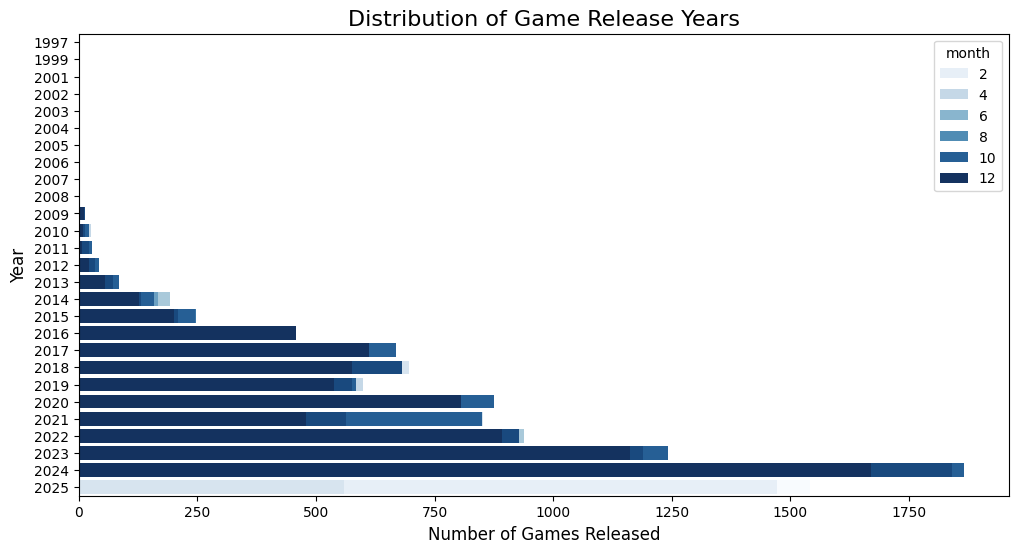

In [39]:
# Distribution of game release years
plt.figure(figsize=(12, 6))

sns.countplot(y='year', data=df, palette='Blues', dodge=False, hue='month')

# plot's title and labels
plt.title('Distribution of Game Release Years', fontsize=16)
plt.xlabel('Number of Games Released', fontsize=12)
plt.ylabel('Year', fontsize=12)

plt.show()


We observe the increasing number of game releases over the years, it is clear that the gaming industry has grown significantly. This upward trend suggests that more developers are entering the market, with more titles being made available on platforms like Steam. The rise in game releases likely reflects a growing demand for gaming, making it a mainstream hobby. Gaming is no longer just a niche interest but a widely embraced pastime.

## What is the popularity of different operation system in the gaming community? 

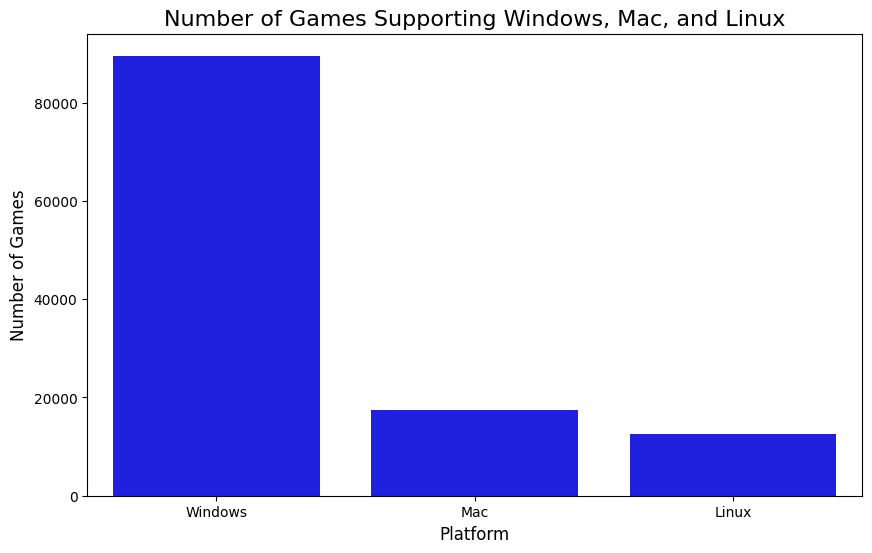

In [41]:
# Compare count between different avaliable OS Linux, Windows, or Mac
platform_counts = {
    'Windows': df['windows'].sum(),
    'Mac': df['mac'].sum(),
    'Linux': df['linux'].sum()
}

platform_df = pd.DataFrame(list(platform_counts.items()), columns=['Platform', 'Number of Games'])

# plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Platform', y='Number of Games', data=platform_df, color='blue')

# plot's title and labels
plt.title('Number of Games Supporting Windows, Mac, and Linux', fontsize=16)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.show()



We can see Windows operation system has a significant majority of games compared to Mac and Linux. Windows dominates the gaming platform, with a significantly higher number of games supporting it compared to Mac and Linux. This is expected, as Windows has traditionally been the primary operating system for gaming due to its widespread adoption, compatibility with a wide range of games, and powerful hardware support. This also shows that overall Mac and Linux has smaller user bases in the gaming community. In addition, there is also a trend recently with developers releasing games that support multiple platforms making their games more global and diverse.

## Correlation Matrix between different variables

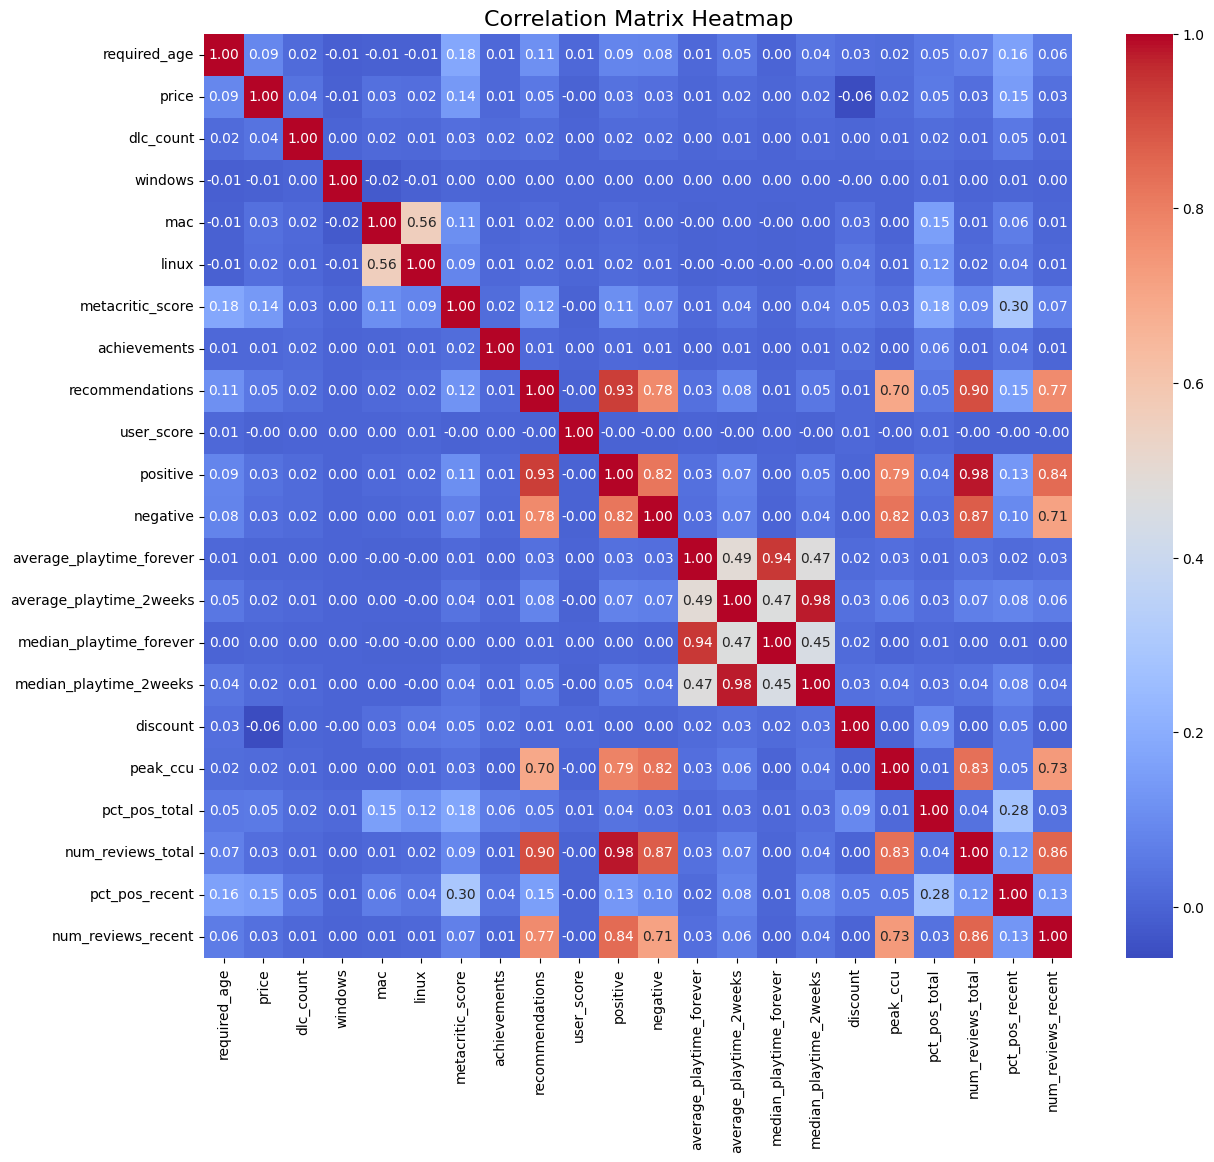

In [60]:
# Calculate correlation matrix
correlation_matrix = df.drop(columns=['appid', 'name', 'release_date','supported_languages', 'full_audio_languages',
       'packages', 'developers', 'publishers', 'categories', 'genres', 'tags', 'estimated_owners', 'year', 'month']).corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

Through the correlation matrix, we can see that the peak ccu (concurrent users) has high correlations with those rating related variables like postivie, negative, recommendations, num_reviews_total, and num_reviews_recent. This make sense as if there are more players recommending or reviewing a certain game, that means the palyer base of that game should be higher, making the possible peak concurrent users to be higher. Same explaination goes the other way around.